# Instructional Airplane Leasing Program

## Overview

This dataset details every accident investigated by the National Transportation Safety Board over the last 40 years.  This data details the make, models, weather conditions, flight phases, injuries, and deaths during each accident.  The data could potentially help organizations find correlations, and identify conditions of an airplane flight that make it safer.  

Key findings:
1. **Cessna** and **Piper** airplanes appear to offer better protection to its passengers during airplane accidents.
2. Accidents that occur during **taxi**, **takeoff**, and **landing** have the **lowest** fatalities rates.  Accidents that occur during **maneuvers** and **cruise** phases have the **highest** fatality rates. 
3. Flights occurring during the **summer** months tend to have **lower** fatality rates that flights occuring during the **winter** months.

## Business Problem

In order to choose safe airplanes for the flight school, we will investigate these business questions:
1. How does the make of the aircraft affect airplane safety?
2. How does the phase of flight affect the survivability of airplane accidents?
3. How do the time of year and weather conditions affect the survival rate an airplane accident? 

To measure airplane safety, we will consider the protection offered by the airplane during an accident.  We will look at this three different ways
- **Survive:** The fraction of accidents with no fatalities.  
- **Survival Rate:** The fraction of passengers killed during an accident
- **Injury Rate:** The fraction of passengers uninjured during an accident. 

## Data Understanding

## Intake Data ?

In this analysis we read in the entire AviationData dataset.  For each record, we use the following data:
- Event Date
- Make of Airplane
- Accidents injured, killed, minor injuries, and uninjured passengers in each accident
- Phase of Flight and weather conditions

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Data/AviationDataClean.csv")

/var/folders/ym/68nrz1n97wj0gz5413bhpqs80000gn/T/ipykernel_4215/3543654083.py:6: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Data/AviationDataClean.csv")


## Outcome Data

## Analysis

### Airplane Safety by Make of Aircraft

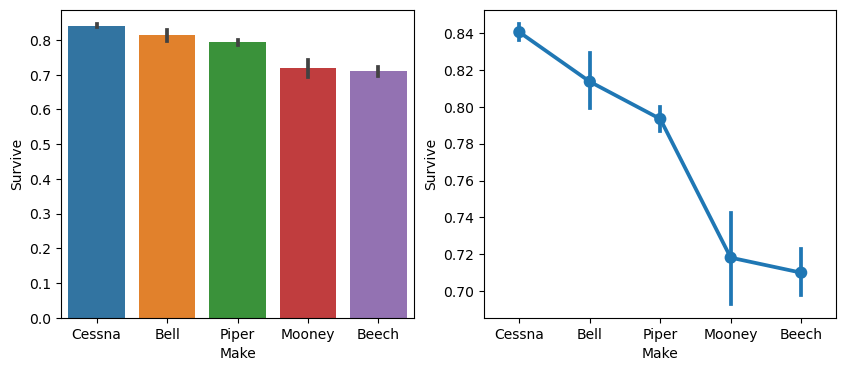

In [3]:
fig, ax = plt.subplots(1,2, figsize = (10,4))

sns.barplot(data=df, x='Make', y = 'Survive', ax = ax[0], order=df[["Make","Survive"]].groupby("Make").mean().sort_values("Survive",ascending=False).index)
sns.pointplot(data=df, x='Make', y = 'Survive', order=df[["Make","Survive"]].groupby("Make").mean().sort_values("Survive",ascending=False).index, ax = ax[1])

fig.savefig("Images/SurviveMake")

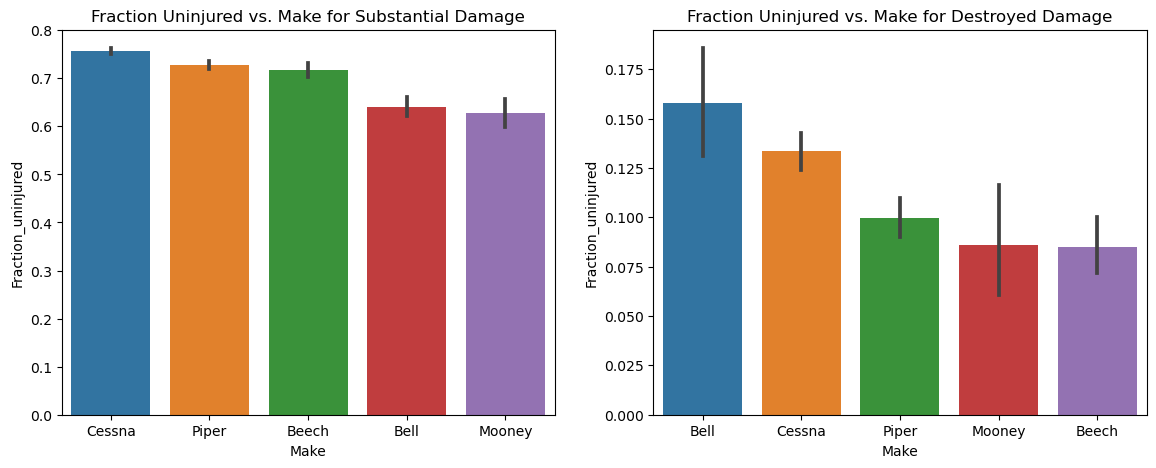

In [4]:
fig, ax = plt.subplots(1,2,figsize=[14,5])

df_substantial = df[df["Aircraft.damage"] == "Substantial"]
df_destroyed = df[df["Aircraft.damage"] == "Destroyed"]

order = df_substantial[["Make","Fraction_uninjured"]].groupby("Make").mean().sort_values(by="Fraction_uninjured",ascending=False).index
sns.barplot(data=df_substantial, x='Make', y = 'Fraction_uninjured',order=order, ax=ax[0])
ax[0].set_title("Fraction Uninjured vs. Make for Substantial Damage")

order = df_destroyed[["Make","Fraction_uninjured"]].groupby("Make").mean().sort_values(by="Fraction_uninjured",ascending=False).index
sns.barplot(data=df_destroyed, x='Make', y = 'Fraction_uninjured',order=order, ax=ax[1])
ax[1].set_title("Fraction Uninjured vs. Make for Destroyed Damage")

fig.savefig("Images/FracUninuredMake")

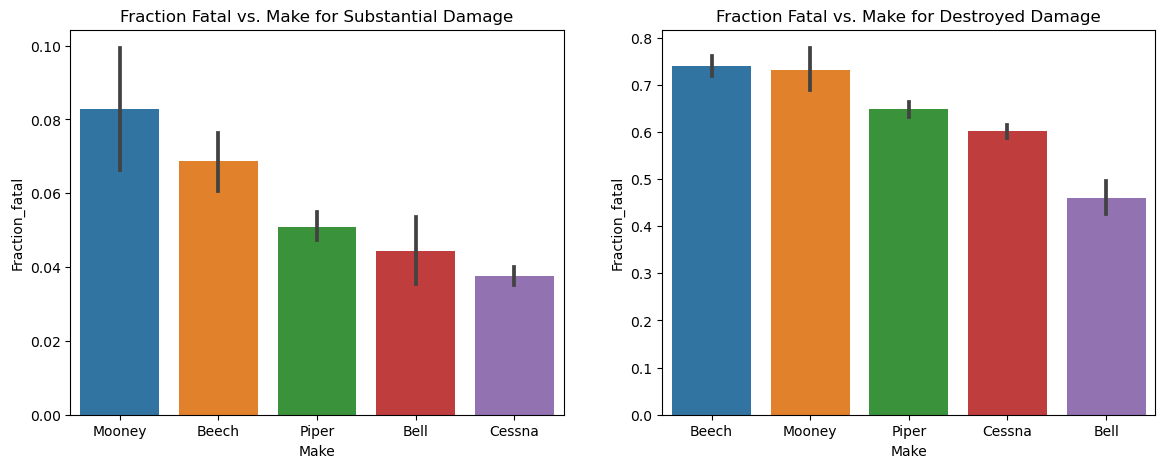

In [5]:
fig, ax = plt.subplots(1,2,figsize=[14,5])

df_substantial = df[df["Aircraft.damage"] == "Substantial"]
df_destroyed = df[df["Aircraft.damage"] == "Destroyed"]

order = df_substantial[["Make","Fraction_fatal"]].groupby("Make").mean().sort_values(by="Fraction_fatal",ascending=False).index
sns.barplot(data=df_substantial, x='Make', y = 'Fraction_fatal',order=order, ax=ax[0])
ax[0].set_title("Fraction Fatal vs. Make for Substantial Damage")

order = df_destroyed[["Make","Fraction_fatal"]].groupby("Make").mean().sort_values(by="Fraction_fatal",ascending=False).index
sns.barplot(data=df_destroyed, x='Make', y = 'Fraction_fatal',order=order, ax=ax[1])
ax[1].set_title("Fraction Fatal vs. Make for Destroyed Damage")

fig.savefig("Images/FracFatalMake")

### Airplane Safety during Phases of Flight

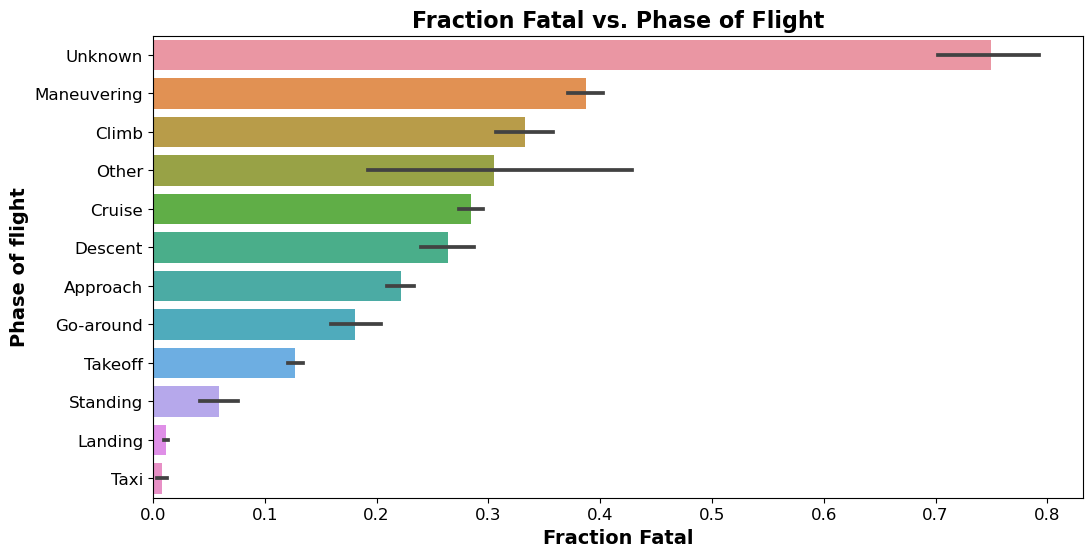

In [7]:
fig, ax = plt.subplots(figsize= (12,6))

phases_flight = df["Broad.phase.of.flight"].value_counts().index[:-2]
df_phases = df[df["Broad.phase.of.flight"].map(lambda x: x in phases_flight)]

order = df[["Broad.phase.of.flight","Fraction_fatal"]].groupby("Broad.phase.of.flight").mean().sort_values(by="Fraction_fatal",ascending=False).index

sns.barplot(data=df, y='Broad.phase.of.flight', x = 'Fraction_fatal', order=order, ax=ax)
ax.set_title("Fraction Fatal vs. Phase of Flight", fontsize=16, fontweight = 'bold')

ax.tick_params(labelsize=12)
ax.set_xlabel('Fraction Fatal', fontweight = 'bold', fontsize=14)
ax.set_ylabel('Phase of flight', fontweight = 'bold', fontsize=14)

fig.savefig("Images/PhaseOfFlightFatality")

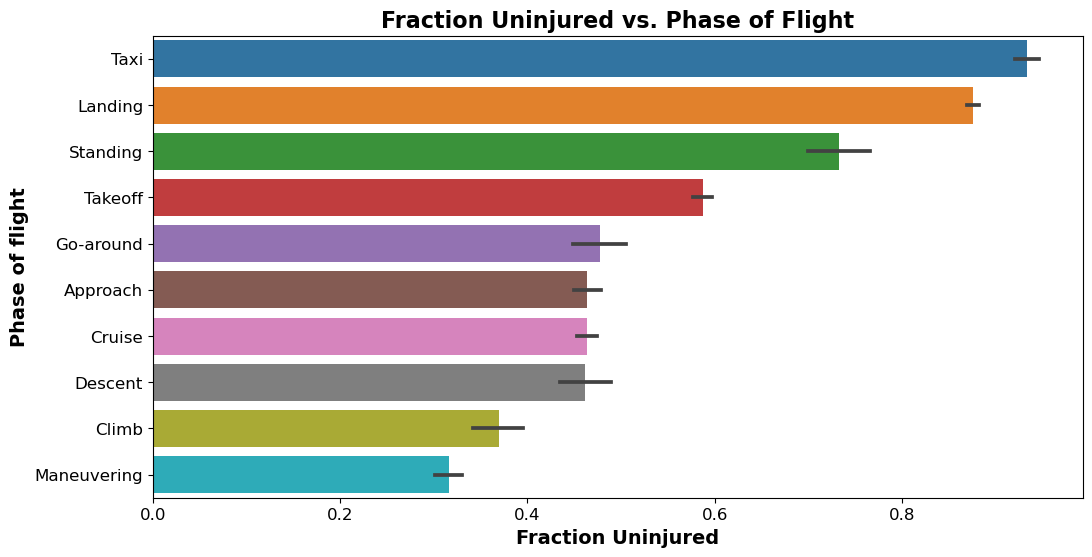

In [8]:
fig, ax = plt.subplots(figsize= (12,6))

order = df_phases[["Broad.phase.of.flight","Fraction_uninjured"]].groupby("Broad.phase.of.flight").mean().sort_values(by="Fraction_uninjured",ascending=False).index

sns.barplot(data=df_phases, y='Broad.phase.of.flight', x = 'Fraction_uninjured', order=order, ax=ax)
ax.set_title("Fraction Uninjured vs. Phase of Flight", fontsize=16, fontweight = 'bold')

ax.tick_params(labelsize=12)
ax.set_xlabel('Fraction Uninjured', fontweight = 'bold', fontsize=14)
ax.set_ylabel('Phase of flight', fontweight = 'bold', fontsize=14)

fig.savefig("Images/PhaseOfFlightUninjured")

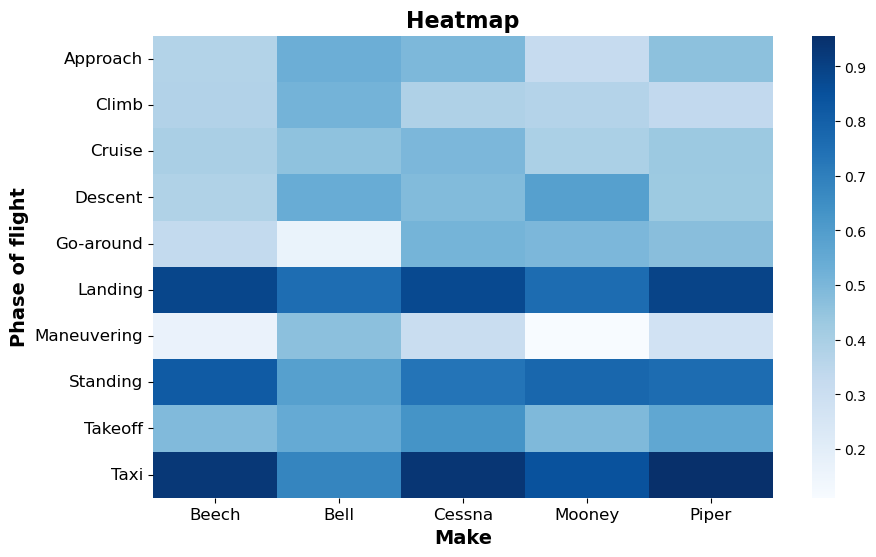

In [9]:
fig, ax = plt.subplots(figsize=(10,6))

#sns.set_context('paper')

table = pd.pivot_table(df_phases, index=['Make'],columns=['Broad.phase.of.flight'], values='Fraction_uninjured').T
sns.heatmap(table, cmap="Blues", ax=ax)
ax.set_title('Heatmap', fontsize=16, fontweight = 'bold')
ax.tick_params(labelsize=12)
ax.set_xlabel('Make', fontweight = 'bold', fontsize=14)
ax.set_ylabel('Phase of flight', fontweight = 'bold', fontsize=14)

fig.savefig("Images/Uninjured_Make_Phases", bbox_inches = 'tight')

### Airplane Safety during Different Months of the Year

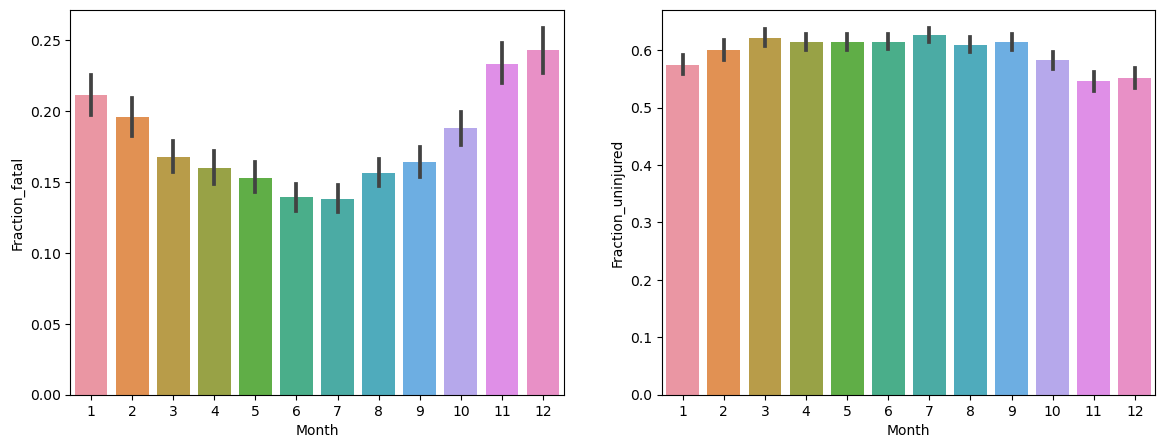

In [10]:
fig, ax = plt.subplots(1,2,figsize=[14,5])

sns.barplot(data=df, x='Month', y = 'Fraction_fatal', ax=ax[0])
sns.barplot(data=df, x='Month', y = 'Fraction_uninjured', ax=ax[1])

fig.savefig("Images/Survival_month")

## Conclusions

## Next Steps